<img src="images/slides_titlepage.png">
<p id="title">Scale out from the very beginning<p>
<!-- <p id="subtitle">Efficiently explore your Dark Data</p> -->
<p id="event">PyData London 2017</p>
<p id="author">Jens Nie</p>

# Scale out from the very beginning
### Efficiently explore your dark data

<table id="contact">
<tr>
<td id="contact">
<p id="name">Jens Nie</p>
<p id="education">Experimental Physics</p>
<p id="twitter">@jneines</p>
<p id="github">http://www.github.com/jneines</p>
</td>
<td id="contact">
<p id="jobtitle">Technology Scout</p>
<p id="company">ROSEN Technology &amp; Research Center</p>
<p id="location">Lingen, Germany</p>
<p id="mail">jnie@rosen-group.com</p>
</td>
</tr>
</table>

The <b id="big">usual</b> Data Science workflow to success looks like this ...

<center>![ds_workflow](./images/ds_workflow_1.jpg)</center>


... with this part being of <b id="big">most interest</b> ...

<center>![ds_workflow_focus_algo_results](./images/ds_workflow_ar.jpg)</center>

... however today we will be looking at the efforts and challenges at the <b id="big">beginning</b> of the workflow ...

<center>![ds_workflow_focus_data](./images/ds_workflow_data.jpg)</center>

... which is often <b id="big">overlooked and underestimated.</b>

<b id="large">Part 1</b>

<b id="large">The story behind all this</b>

<table>
<tr id="twocolumn">
<td width="50%" id="twocolumn">
<img src="./images/ROSEN_serving.png">
</td>
<td id="twocolumn">
<p id="small">ROSEN is a leading privately owned company that was established as a one-man business in 1981. Over
the last 35 years, ROSEN has grown rapidly and is today a worldwide technology group that operates in
more than 120 countries with over 2,700 employees.</p>

<p id="small">ROSEN’s products and services:</p>
<ul>
<li id="small"> Inspection of critical industrial assets to ensure reliable operations of the highest standards and effectiveness
<li id="small"> Customized engineering consultancy providing efficient asset integrity management
<li id="small"> Production and supply of customized novel systems and products
<li id="small"> Market-driven, topical state-of-the-art research and development providing “added value” products and services
</ul>
</p>
</td>
</tr>
</table>


* renown for <b id="big">pipeline inspection</b> services for more than 30 years
* service is based on devices traveling along the inside of the pipeline (<b id="big">pigs</b>) collecting data from continuous measurements
* we have always used <b id="big">state of the art</b> measurement technology and resolution ...
* ... resulting in <b id="big">large datasets</b> to be processed ever since
* today a single inspection can be longer than <b id="big">1000 km</b> ...
* ... and collecting <b id="big">multiple TB</b> of data
* this creates a large pool of data to work with

Developing new <b id="big">data centric</b> services and a variety of stakeholders with different mindsets regarding data demanded to <b id="big">aggregate our storage solutions</b> over time.

<center>![storage below the desk](./images/below_the_desk_storage.jpg)</center>

So we developed from multiple <b id="big">below the desk</b> hard disk arrays suitable for project internal needs ...

<center>![several servers based storage](./images/several_servers.jpg)</center>
... to a number of <b id="big">central servers</b> allowing first overall insights ...

<center>![isilon storage](./images/isilon_storage.jpg)</center>

... to a single <b id="big">Isilon</b> based storage solution with a single 1.5 PB filesystem keeping all the data in one location.

<b id="large">However,</b>

having all data in one place however did not solve all problems!

In the beginning there was great <b id="big">satisfaction</b>, as the introduction of simple and meaningful directory structures when uploading the data to the Isilon, combined with its mere performance allowed rapid and <b id="big">high performance</b> data access for the vast majority of users.

But over the years, with

* <b id="big">new services</b> for combined evaluation forcing older datasets to stay available online
* directory structures <b id="big">changing</b>
* data formats being <b id="big">optimized</b>
* <b id="big">new</b> file formats introduced
* people getting very <b id="big">creative</b> when storing their data under pressure ;-)
* <b id="big">copies of copies</b> of the data being created, just to be safe

... the initially completed convergence of data started to <b id="big">diverge</b> again resulting in a huge pool of uncertain, underrated and unorganized information floating around, which is difficult to access and explore and reliably use.

<b id="large">A mess which we may just call</b>

<p id="huge">Dark Data</b>

<b id="big">Dark data</b> is <b id="small">according to Gartner</b> understood to be the <b id="big">information assets</b> that organizations <b id="big">collect</b>, process and store during regular business activities, but generally <b id="big">fail to use</b> for other purposes.

That's what summarised our situation as well and definitely <b id="big">needed to be changed</b>.

It's just way to <b id="big">expensive</b> to preserve this state!

Our <b id="large">lessons learned</b> revealed that restructuring the data is not a good idea. 

Divergence in structure usually has a <b id="big">[good]</b> reason.

<b id="large">The better idea</b>

is to offer <b id="big">smart services</b> for finding and retrieving the data.

This will significantly reduce the costs and efforts at the initial stages of new data centric projects.

And this is what this talk is all about.

We have planned a <b id="big">variety of interacting services</b>, such as 

* a <b id="big">filesystem scanner</b>
* a database to store a smart <b id="big">table of contents</b>
* a file <b id="big">tagging</b> service 
* and a <b id="big">data provider</b> and display with a transcoding engine to serve the different needs of our users and to overcome the multiple historic data structures and file formats. 

This talk will however focus on the journey to create the initial component of the service stack, which is an  efficient ...

<b id="large">distributed filesystem scanner</b>

<b id="large">Part 2</b>

<b id="large">Implementations</b>

<b id="large">Keeping up with the tradition</b>

Start off very simple (and <b id="big">naive</b>): Recursive scan of an entry directory.

The most straightforward approach un Unix based systems is to use `find` for this.

E.g. 

`find /tmp -type f`

will generate a list of paths of all files in the `/tmp` directory of the filesystem. 

Let's emulate this in Python using `os.walk`.

Based on the code from the [official Python Documentation](https://docs.python.org/3/library/os.html#os.walk) we end up with something like this.

In [2]:
import os
import time

entry_dir="/media/linfile1/groups/Big_Data_Lab/development/jnie/"

all_files=[]

tic=time.time()
for root, dirs, files in os.walk(entry_dir):
    for _file in files:
        all_files.append(os.path.join(root, _file))
toc=time.time()

print(all_files[:5])
print(len(all_files), toc-tic)

['/media/linfile1/groups/Big_Data_Lab/development/jnie/hadoop_based_hdfs_read_benchmark2-results.dat', '/media/linfile1/groups/Big_Data_Lab/development/jnie/parallel write tests.ipynb', '/media/linfile1/groups/Big_Data_Lab/development/jnie/hadoop_based_hdfs_read_benchmark2.py', '/media/linfile1/groups/Big_Data_Lab/development/jnie/hadoop_based_hdfs_read_benchmark2.errors', '/media/linfile1/groups/Big_Data_Lab/development/jnie/Untitled1.ipynb']
58200 13.477147340774536


But this creates just a <b id="big">list of files</b>.

And it's <b id="big">costly</b> to generate (remember the 1.5 PB) and therefore not very efficient

You can of course save the results and base on these for further analysis.

But it has <b id="big">not enough details</b> to serve everyones needs anyways.

So we ended up in creating an implementation which included the following details for each file:

* base <b id="big">directory</b> of the file
* the <b id="big">filename</b> itself
* <b id="big">type</b> of file by using the file extension/suffix in lowercase
* <b id="big">size</b> of the file in bytes
* <b id="big">ownership</b> of the file using uid and gid
* several <b id="big">timestamps</b> (creation time, modification time and last access)
* the date and time the file has been <b id="big">last seen</b> in the scanning process <b id="small">(which is not taken into account in the following)</b>

These <b id="big">additional properties</b> can be retrieved by doing corresponding `os.stat` calls on each file.

To <b id="big">ease further usage</b> the time properties are converted to datetime objects.

Furthermore the stat calls can help to <b id="big">narrow down</b> the scan results dropping all entries not referring to real files, such as links and device entries, should they exist, keeping just the entries that we're out for.

Let's create a <b id="big">little helper</b> function to do all the work.

In [6]:
import stat
import pendulum

def get_file_info(path):
    path = os.path.abspath(path)
    
    dirname, filename = os.path.split(path)
    filetype = os.path.splitext(filename)[1][1:].lower()
    
    stat=os.stat(path)
    
    size = stat.st_size
    owner = stat.st_uid
    group = stat.st_gid
    ctime = pendulum.from_timestamp(stat.st_ctime)
    mtime = pendulum.from_timestamp(stat.st_mtime)
    atime = pendulum.from_timestamp(stat.st_atime)
    
    return (dirname, filename, filetype, size, owner, group, ctime, mtime, atime)

In [3]:
all_files=[]
number_of_dirs=0
number_of_files=0

tic=time.time()

iteration=0
for root, dirs, files in os.walk(entry_dir):
    iteration+=1
    number_of_dirs+=len(dirs)
    
    for _file in files:
        path=os.path.join(root, _file)
        if not os.path.isfile(path):
            continue
        if os.path.islink(path):
            continue
        number_of_files+=1
        
        file_info=get_file_info(path)
        all_files.append(file_info)
        
    if (iteration % 1000)==0:
        print(iteration, number_of_dirs, number_of_files)

toc=time.time()
print(len(all_files), toc-tic)

1000 1209 1176
2000 2029 1517
3000 3411 31376
4000 4029 56159
5000 5017 57548
57916 39.880743741989136


This will generate a neat list of entries with all the desired details, which will fit nicely into a <b id="big">pandas Dataframe</b> for further analysis.

In [4]:
import pandas as pd
df=pd.DataFrame(all_files, columns=["dirname", "filename", "filetype", "owner", "size", "ctime", "mtime", "atime"])
df.head()

,dirname,filename,filetype,owner,size,ctime,mtime,atime
0,/media/linfile1/groups/Big_Data_Lab/developmen...,hadoop_based_hdfs_read_benchmark2-results.dat,dat,2805,49,2015-07-16 07:03:19.358181+00:00,2015-07-16 07:03:19.333891+00:00,2015-07-16 07:03:19.329187+00:00
1,/media/linfile1/groups/Big_Data_Lab/developmen...,parallel write tests.ipynb,ipynb,2805,17738,2015-07-13 08:58:24.876960+00:00,2015-07-13 08:58:24.850228+00:00,2016-10-17 14:32:01.180144+00:00
2,/media/linfile1/groups/Big_Data_Lab/developmen...,hadoop_based_hdfs_read_benchmark2.py,py,2805,1676,2015-07-20 11:48:22.512641+00:00,2015-07-20 11:48:22.504385+00:00,2015-07-28 07:16:39.278389+00:00
3,/media/linfile1/groups/Big_Data_Lab/developmen...,hadoop_based_hdfs_read_benchmark2.errors,errors,2805,14299,2015-07-14 11:45:31.289014+00:00,2015-07-14 11:45:31.289014+00:00,2016-03-03 09:48:27.513328+00:00
4,/media/linfile1/groups/Big_Data_Lab/developmen...,Untitled1.ipynb,ipynb,2805,16262,2015-07-16 07:12:49.813747+00:00,2015-07-16 07:12:49.798924+00:00,2015-07-20 07:15:56.302525+00:00


With the <b id="big">results</b> organized like so, you can already retrieve some good insights from the numbers, such as 

* the number of files and directories
* the file count per file type
* how many file owners there are
* and how many files they have occupying what amount of the storage
* the overall size of the pool of data scanned
* the overall size per file type
* and more

We will leave a more detailed view on this as a <b id="big">bonus feature</b> at the end of the talk.

But it's also interesting to <b id="big">keep track</b> of how long each directory scan performed took.

If we had benchmarked the scan in <b id="big">more detail</b>, storing the number of entries and the necessary time to perform each scan as tuples in in a list called `stat`, the results would look like the following.

<IPython.core.display.Javascript object>


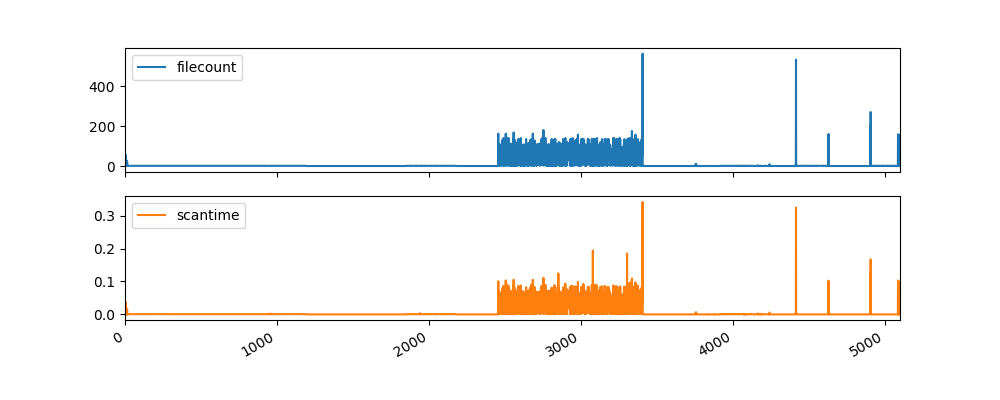

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ae88dcf8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x7f79ab4f7dd8>]], dtype=object)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

sdf=pd.DataFrame(stats, columns=["filecount", "scantime"])
sdf.plot(subplots=True, layout=(2,1), figsize=(10,4), sharex=True)

As you can see <b id="big">most of the directories</b> don't have many entries and are therfore <b id="big">quickly</b> scanned. 

Some on the other hand have a very <b id="big">large number of entries</b>, which considerably <b id="big">slows down</b> the scan process.

The `os.walk` based approach is the <b id="big">most traditional way</b> of scanning a filesystem.

Whilst it is perfectly suitable to create a simple list of entries, it is <b id="big">not very efficient</b> as soon as more detailed properties have to be collected, such as we have to.

There is however a <b id="big">more efficient implementation</b> available in Python 3.x called `os.scandir`.

It is based on an <b id="big">iterators</b> and returns `os.DirEntry` objects offering higher performance by joining the list and the stat operation in one go. 

This should result in a <b id="big">small speedup</b>.

As we do no longer work on paths and no longer use the `os.walk` approach our implementation changes a bit.

The <b id="big">helper</b> function to retrieve the file info has to be slightly adjusted.

In [7]:
def get_file_info(dir_entry):
    dirname = os.path.abspath(os.path.dirname(dir_entry.path))
    filename = dir_entry.name
    filetype = os.path.splitext(dir_entry.path)[1][1:].lower()
    stat=dir_entry.stat()
    size = stat.st_size
    owner = stat.st_uid
    group = stat.st_gid
    ctime = pendulum.from_timestamp(stat.st_ctime)
    mtime = pendulum.from_timestamp(stat.st_mtime)
    atime = pendulum.from_timestamp(stat.st_atime)
    
    return (dirname, filename, filetype, size, owner, group, ctime, mtime, atime)

And we need to change the way we iterate over the directory tree.

It's actually a <b id="big">neat concept</b> that is used here which is based on clearing up a <b id="big">todo list</b> which is constantly <b id="big">refilled</b> by scan results until completion.

In [7]:
tic=time.time()

all_files=[]
number_of_files=0

todo=[entry.path for entry in os.scandir(entry_dir) if entry.is_dir(follow_symlinks=False)]
number_of_dirs=len(todo)

iteration=0
for entry in todo:
    iteration+=1
    
    for item in os.scandir(entry):
        if item.is_dir():
            todo.append(item.path)
            number_of_dirs+=1
        elif item.is_file(follow_symlinks=False):
            file_info = get_file_info(item)
            all_files.append(file_info)
            number_of_files+=1
        else:
            pass
    
    if (iteration % 1000)==0:
        print(iteration, number_of_dirs, number_of_files)
    
toc=time.time()
print(len(all_files), toc-tic)

1000 2895 1952
2000 3791 24556
3000 3867 57329
4000 5097 57654
5000 5097 57904
57904 61.60576915740967


The overall <b id="big">speedup</b> is there. But it's not a large step.

The problem is still the sort of <b id="big">blocking behaviour</b> occuring when scanning large directories, which prevents quick progress when using a <b id="big">single CPU</b>, which we still do.

Can we go multicore then?

<b id="large">Scale a bit</b>

The <b id="big">idea</b> here is to distinguish between <b id="big">directory</b> and <b id="big">file</b> entries and work with them <b id="big">separately</b>.

Currently we're extending the todo list with every directory we find, but the <b id="big">next</b> directory scan is <b id="big">not triggered before</b> the current directory scan is <b id="big">complete</b>.

As there are no connections between the contents of several directories, this seems to be the ideal entry point for <b id="big">parallelizing the work</b>.

So we should have a <b id="big">single todo list</b> of directories to be scanned by a <b id="big">number of workers</b> creating a single set of resulting files.

The most <b id="big">straightforward approach</b> for this is probably to use Pythons multiprocessing module for this.

It's based on <b id="big">mapping</b> a single function onto a <b id="big">list of parameters</b> creating the desired results. A completely independent list of parameters will allow perfect parallelization of work in this case.

So let's create the function to be <b id="big">mapped</b>

It should take a path to a directory as an argument and return its scan results following the old `os.walk` approach.

In [9]:
def scan_dir(root):
    dirs=[]
    files=[]   
    
    for item in os.scandir(root):
        if item.is_dir():
            dirs.append(item.path)
        elif item.is_file(follow_symlinks=False):
            file_info = get_file_info(item)
            files.append(file_info)
        else:
            pass

    return (root, dirs, files)

The main block changes by using a <b id="big">Pool</b> with a suitable amount of <b id="big">workers</b> working on our steadily changing <b id="big">todo list</b>.

<b id="big">New</b> directories coming in are <b id="big">appended</b> to the todo list, whereas <b id="big">completed</b> ones are removed.

An <b id="big">empty</b> todo list will <b id="big">end</b> the scan and <b id="big">clean up</b> the pool of workers.

In [11]:
import multiprocessing
import itertools

tic=time.time()

_, todo, files= scan_dir(entry_dir)
results=[files]
number_of_dirs=0
number_of_files=0

with multiprocessing.Pool(processes=2) as pool:
    iteration=0
    while True:
        iteration+=1
        if not todo:
            break
       
        for root, dirs, files in pool.map(scan_dir, todo):
            number_of_dirs+=len(dirs)
            todo.extend(dirs)
            results.append(files)
            todo.remove(root)
            number_of_files+=len(files)
            
        print(iteration, len(todo), number_of_dirs, number_of_files)
            
all_files=list(itertools.chain.from_iterable(results))
toc=time.time()

print(iteration, len(all_files), toc-tic)

1 31 31 77
2 2853 2884 956
3 972 3856 57329
4 1230 5086 57651
5 0 5086 57904
6 57916 4.271350622177124


That's a <b id="big">notable speedup</b>.

<p id="huge">Scale out!</p>

<b id="large">Keeping up with the time</b>

<b id="big">Introduction to dask</b>

From the docs:

`dask.distributed` is a lightweight library for <b id="big">distributed computing</b> in Python.

It extends both the `concurrent.futures` and `dask` APIs to moderate sized clusters.

<b id="big">Install</b> it using

`conda install dask distributed -c conda-forge`

<b id="big">`dask`</b> itself has been created to address <b id="big">large and memory intense</b> problems.

It was meant to offer a <b id="big">simple solution</b> for problems, where the data to be worked on <b id="big">no longer fits into memory</b>.

<b id="big">Before</b> `dask` you had to <b id="big">manually split up</b> your problem and work with chunks of data processing intermediate results on the way to the final set of numbers.

<b id="big">Or</b> you were to enter the world of <b id="big">distributed computing</b> using `mpi` for example, a sort of batch system, or some hadoopish approach.

For many this was like taking a <b id="big">sledgehammer to crack a nut.</b>

And with the additional protocol overhead introduced it takes quite some hardware without dropping performance, which tends to be expensive.

With `dask` you could just use available <b id="big">local storage to extend</b> yur main memory and let `dask` do the necessary tricks under the hood. 

With the ever increasing performance of SSDs this turns out to be a <b id="big">great idea</b>.

`dask` also implements the `numpy` interface for almost all operations, so it may act as <b id="big">a drop in replacement</b> allowing to work with larger datasets without changing the existing code.

So what `dask` really does under the hood is breaking up the work into smaller parts organized by a <b id="big">task graph</b>, which is iterated until completion of the work, steadily paging the data in and out of the main memory if needed. 

This is a well known and robust approach, which also introduces just <b id="big">little overhead</b>.

Furthermore it allows to complete independent <b id="big">subtasks in parallel</b>, which utilizes the available hardware as good as possible, offering a nice <b id="big">potential for a speedup</b>.

And by introducing some code for <b id="big">network</b> communication and organization, the workers do not even need to be located on the same machine. This is implememted in the <b id="big">`distributed`</b> part of `dask`.

And this is exactly what we're about to be using to distribute our workload.

<b id="big">Usage</b>

First of all you have to have a <b id="big">central scheduler</b> and a number of <b id="big">workers</b> up and running.

It's advisable to start off using a <b id="big">local Cluster</b> running on a single machine. 

This will also mimic the multiprocessing approach we used before.

So <b id="big">let's do</b> exactly that.

<b id="big">Instead</b> of creating a `multiprocessing.Pool` we are creating a `LocalCluster` with the same number of processes and connect our work `scheduler` to it.

To complete the work we're still following the concept of <b id="big">emptying a dynamic todo list</b>. However this list now holds `future` objects, which is a concept introduced with bringing <b id="big">asynchronous programming</b> to Python. 

All calls generating <b id="big">futures will directly return</b>.

And the <b id="big">corresponding results</b> can be expected to become available. They can be <b id="big">awaited</b>.

It `dask.distributed` we us the `as_completed` function to iterate over the results. This ensures to loop over the results <b id="big">as they become available</b> instead of the <b id="big">order they have been generated</b>.

Using the <b id="big">local cluster</b> backend this should take pretty much the same time as the multiprocessing approach.

In [13]:
from distributed import Client, LocalCluster, as_completed

all_files=[]
number_of_dirs=0
number_of_files=0

tic = time.time()
with LocalCluster(n_workers=2) as cluster:
    with Client(cluster) as client:
        print(client)

        futures=[client.submit(scan_dir, entry_dir)]

        iteration=0
        while True:
            iteration+=1

            for future in as_completed(futures):
                futures.remove(future)
                root, dirs, files=future.result()

                all_files.extend(files)
                number_of_dirs+=len(dirs)
                number_of_files+=len(files)
                futures.extend([client.submit(scan_dir, subdir) for subdir in dirs])

            print(iteration, len(futures), number_of_dirs, number_of_files)

            if not futures:
                break

toc=time.time()

print(iteration, len(all_files), toc-tic)

<Client: scheduler='tcp://127.0.0.1:25780' processes=2 cores=16>
1 11 11 12
2 31 42 89
3 2853 2895 968
4 972 3867 57341
5 1230 5097 57663
6 0 5097 57916
6 57916 48.8433153629303


In order to quickly create a <b id="big">real distributed cluster</b> for use with dask you can use the `dask-ssh` helper utility.

Using the <b id="big">following command</b> I am creating a cluster of 10 machines with 16 cores each resulting in a dask cluster using 160 cores.

`dask-ssh node00{01..10} --nprocs 16 --nthreads 1`

With specifying 16 cores and 1 thread explicitely I've decided to use <b id="big">real processes</b> to perform the work. You can of course also favor a thread based setup. It largely depends on the task being performed, which approach is best.

To use the new setup you would just need to <b id="big">change</b> the `Client` instantiation to point to the scheduler address.

<b id="big">The remaining part of the script remains unchanged.</b>


In [16]:
futures=[]
all_files=[]
number_of_dirs=0
number_of_files=0

tic=time.time()
with Client("node0001:8786") as client:
    print(client)

    futures.extend([client.submit(scan_dir, entry_dir)])

    iteration=0
    while True:
        iteration+=1

        for future in as_completed(futures):
            futures.remove(future)
            root, dirs, files=future.result()

            all_files.extend(files)
            number_of_dirs+=len(dirs)
            number_of_files+=len(files)
            futures.extend([client.submit(scan_dir, subdir) for subdir in dirs])

        print(iteration, len(futures), number_of_dirs, number_of_files)

        if not futures:
            break

toc=time.time()

print(iteration, len(all_files), toc-tic)

1 11 11 12
2 31 42 89
3 2853 2895 968
4 972 3867 57341
5 1230 5097 57663
6 0 5097 57916
6 57916 33.69023108482361


And this is the output of the distributed version:

<pre id="smaller">
	1     47         51         10      0
    2    384        435        480      2
    3   1111       1546       2527      2
    4   5704       7250       8535      2
    5  17806      25056      61164      3
    6  75294     100350     160420      3
    7  49784     150134     907686      3
    8  88867     239001    2236862      3
    9 107071     346072    7595319      3
   10  65369     411441   12809371      3
   11  50975     462416   14100842      3
   12  20899     483315   15483165      3
   13  11411     494726   15747717      3
   14   4665     499391   15937513      3
   15   9955     509346   15983627      3
   16    713     510059   16052514      3
   17    321     510380   16059515      3
   18    110     510490   16062227      3
   19     73     510563   16063022      3
   20     77     510640   16063539      3
   21     37     510677   16063842      3
Scanned 510677 dirs in 3243.81 s finding 16063935 files.
</pre>

The scanning process completed in less than an hour.

That's the expected <b id="big">vast</b> speedup.

[insert some more benefits of this solution]

And this is an excerpt of the <b id="big">status page</b> which is served by the scheduler showing the progress of the scan.

<center>![fs scan progress](./images/fs-scan-progress.gif)</center>

<b id="large">Message to take home</b>

- <b id="big">scale out</b> from the very beginning <b id="small">as it is simple</b>
- <b id="big">don't force creating structures</b> prior to collecting your data
- find ways to <b id="big">document the data</b> that is available <b id="small">to ease using it</b>
- <b id="big">publish a table of contents</b> of the available data on a regular base <b id="small">to allow finding desired datasets quickly</b>
- create <b id="big">awareness</b> of what's there and the value related to the data

<p id="huge">Questions?</p>

<b id="large">Bonus round</b>

<b id="large">More detailed statistics</b>

Read in the scan results stored in csv files into a distributed pandas dataframe.

In [ ]:
csv_files="./fs_scan_results/csv/files_and_stat_ilidata_*.csv"
df=dd.read_csv(csv_files,
              names=["dirname", "filename", "ext", "uid", "gid", "size", "atime", "mtime", "ctime"],
              dtype={"dirname":str, "filename":str, "ext":str, "uid":int, "gid":int, "size":int},
              parse_dates=["atime", "mtime", "ctime"]
              )

Define all necessary computations on the dataframe as tasks in a dictionary.

In [ ]:
tasks={}
tasks["number_of_all_files"]=df.filename.count()
tasks["size_of_all_files"]=df["size"].sum()
tasks["number_of_srh5_files"]=df[df["ext"]==".srh5"]["filename"].count()
tasks["size_of_srh5_files"]=df[df["ext"]==".srh5"]["size"].sum()
tasks["number_of_project_files"]=df[df.project.notnull()]["filename"].count()
tasks["size_of_project_files"]=df[df.project.notnull()]["size"].sum()

for column in ["dirname", "ext", "uid", "project"]:
    tasks["{0:s}_with_most_files".format(column)]=df[column].value_counts().nlargest(5)
    tasks["{0:s}_with_most_data".format(column)]=df[[column, "size"]].groupby([column])["size"].sum().nlargest(5)

Trigger the computation.

In [ ]:
results = dd.compute(*tasks.values())

The dask status page looks even more attractive now.

<center>![rundata analysis](./images/analyze-rundata-progress.gif)</center>

Retrieve the results and merge them together with the task descriptions into a result dictionary.

In [ ]:
computed=dict(zip(tasks.keys(), results))

And present the results. 

<b id="small">These are from an older scan.</b>

In [ ]:
print("Number of files found: {0:d}".format(computed["number_of_all_files"]))
print("Size of files: {0:s}.".format(format_size(computed["size_of_all_files"])))
print("Number of srh5 files found: {0:d}".format(computed["number_of_srh5_files"]))
print("Size of srh5 files: {0:s}.".format(format_size(computed["size_of_srh5_files"])))
print("Number of project related files found: {0:d}".format(computed["number_of_project_files"]))
print("Size of project related files: {0:s}.".format(format_size(computed["size_of_project_files"])))

<pre id="smaller">
Number of files found: 14453309
Size of files: 437.11 TB.
Number of srh5 files found: 1190063
Size of srh5 files: 322.18 TB.
Number of project related files found: 8115216
Size of project related files: 372.86 TB.
</pre>

<img src="images/slides_closingpage.png">